# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [ ]:
# Load pickled data
import pickle
import csv
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
path="./Data"
training_file = path + "/train.p"
validation_file= path +"/valid.p"
testing_file = path + "/test.p"
signnames_file = path + "/signnames.csv" 

  
        
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
classnames = []
with open(signnames_file, mode='r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    next(spamreader, None) 
    for i, row in enumerate(spamreader):
        assert(i==int(row[0]))
        classnames.append(row[1])  

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
#print(classnames)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [ ]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

def GetLabelImage(index): 
    path="./Data"
    image=cv2.imread(path+'/signnames_all.jpg',1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    H, W, _ = image.shape
    dY = H/7.
    dX = W/7.105
    y = index//7
    x = index%7 
    labelImage = image[round(y*dY):round(y*dY+dY), round(x*dX):round(x*dX+dX),:]
    labelImage = cv2.resize(labelImage, (0,0), fx=32./dX, fy=32./dY,)
    return labelImage

def InsertSubimage(image, subImage, y, x):
    h, w, _ = subImage.shape
    image[y:y+h, x:x+w, :]=subImage
    return image

def CreateDataSummary(images, labels, sampleNumber, multiplier):
    imageShape = (images.shape)[1:4]
    all_labels=np.unique(labels).astype(int)
    classNumber = np.amax(all_labels)+1
    subimageWidth=imageShape[1]
    subimageHeight=imageShape[0];
    resultImageWidth=subimageWidth*(classNumber);
    resultImageHeight=subimageHeight*sampleNumber;
    resultImageChanel=imageShape[2];
    resultImage = 255.*np.ones(shape=(resultImageHeight,resultImageWidth,resultImageChanel),dtype=np.float32)
    cv2.putText(resultImage, "Training data histogram", (int(subimageWidth*0.01), int(resultImageHeight*0.05)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)
    for index in all_labels:
        index=int(index)
        labelImage = GetLabelImage(index)
        InsertSubimage(resultImage, labelImage, resultImageHeight-subimageHeight*2, subimageWidth*index)
        indexList = list(np.where(labels== index)[0])
        count=len(indexList)
        if(count>0):
            meanImage = np.average(images[indexList], axis=0)
            InsertSubimage(resultImage, meanImage, resultImageHeight-subimageHeight*3, subimageWidth*index)
        totalDisplaySample=sampleNumber*multiplier;
        percentage = float(count)/float(len(labels))
        numberDisplaySample=int(totalDisplaySample*count/len(labels))
        for i in range(numberDisplaySample):
            sampleImage=images[np.random.choice(indexList)]
            if(resultImageHeight-subimageHeight*(7+i)<0):
                break
            else:
                InsertSubimage(resultImage, sampleImage, resultImageHeight-subimageHeight*(3+i), subimageWidth*index)
        cv2.putText(resultImage, '{:.0%}'.format(percentage), (int(subimageWidth*index), int(resultImageHeight-subimageHeight*0.5)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
    cv2.line(resultImage,(0,resultImageHeight-subimageHeight*3),(resultImageWidth,resultImageHeight-subimageHeight*3),(0,0,127),3)
    #cv2.imwrite(path+'/train_data_summary.jpg',cv2.cvtColor(resultImage, cv2.COLOR_BGR2RGB))
    return resultImage



In [ ]:
resultImage=CreateDataSummary(X_train,y_train,sampleNumber=27, multiplier=15)
plt.rcParams["figure.figsize"] = (20,25)
plt.imshow(resultImage.astype(np.uint8))
plt.axis('off') 
plt.show()

In [ ]:
import math
import random
def Perturb(image, angle_limit=15, scale_limit=0.1, translate_limit=3, distort_limit=3, illumin_limit=0.7):
    (W, H, C) = image.shape
    center = np.array([W / 2., H / 2.])
    da = np.random.uniform(low=-1, high=1) * angle_limit/180. * math.pi
    scale = np.random.uniform(low=-1, high=1) * scale_limit + 1

    cc = scale*math.cos(da)
    ss = scale*math.sin(da)
    rotation    = np.array([[cc, ss],[-ss,cc]])
    translation = np.random.uniform(low=-1, high=1, size=(1,2)) * translate_limit
    distort     = np.random.standard_normal(size=(4,2)) * distort_limit

    pts1 = np.array([[0., 0.], [0., H], [W, H], [W, 0.]])
    pts2 = np.matmul(pts1-center, rotation) + center  + translation

    #add perspective noise
    pts2 = pts2 + distort


    #http://milindapro.blogspot.jp/2015/05/opencv-filters-copymakeborder.html
    matrix  = cv2.getPerspectiveTransform(pts1.astype(np.float32), pts2.astype(np.float32)) 
    perturb = cv2.warpPerspective(image, matrix, (W, H), flags=cv2.INTER_LINEAR,
                                    borderMode=cv2.BORDER_REFLECT_101)  # BORDER_WRAP  #BORDER_REFLECT_101  #cv2.BORDER_CONSTANT  BORDER_REPLICATE

    #illumination -------------
    #from mxnet code
    
    #brightness
    alpha = 1.0 + illumin_limit*random.uniform(-1, 1)
    perturb = perturb * alpha
    perturb = np.clip(perturb,0.,255.)
    pass

    #contrast
    coef = np.array([[[0.299, 0.587, 0.114]]]) #rgb to gray (YCbCr) :  Y = 0.299R + 0.587G + 0.114B

    alpha = 1.0 + illumin_limit*random.uniform(-1.0, 1.0)
    gray = perturb * coef
    gray = (3.0 * (1.0 - alpha) / gray.size) * np.sum(gray)
    perturb *= alpha
    perturb += gray
    perturb = np.clip(perturb,0.,255.)
    pass

    #saturation
    coef = np.array([[[0.299, 0.587, 0.114]]]) #rgb to gray (YCbCr) :  Y = 0.299R + 0.587G + 0.114B

    alpha = 1.0 + illumin_limit*random.uniform(-1.0, 1.0)
    gray = perturb * coef
    gray = np.sum(gray, axis=2, keepdims=True)
    gray *= (1.0 - alpha)
    perturb *= alpha
    perturb += gray
    perturb = np.clip(perturb,0.,255.)
    pass

    return perturb

def GetSampleNumber(labels,index):
    indexList = list(np.where(labels == index)[0])
    return len(indexList)

def GetMaximumSampleNumber(labels):
    catagoryCount=len(np.unique(labels))
    maximumSampleCount=0
    for catagory in range(catagoryCount):
        count=GetSampleNumber(labels,catagory)
        if(count > maximumSampleCount):
            maximumSampleCount = count
    return maximumSampleCount

def EvenOutSamples(images, labels):
    catagoryCount=len(np.unique(labels))
    maximumSampleCount=GetMaximumSampleNumber(labels)
    images_ext = np.empty([0, image_shape[0], image_shape[1], image_shape[2]], dtype=np.float32)
    labels_ext = np.empty([0], dtype=np.int32)
    for catagory in range(catagoryCount):
        addition=maximumSampleCount - GetSampleNumber(labels,catagory)
        indexList = list(np.where(labels == catagory)[0])
        print("Generating ",catagory,"th Catagoty, ",addition," to be generated")
        for i in range(addition):
            index = np.random.choice(indexList)
            newImage=Perturb(images[index,:,:,:])
            newImage=np.reshape(newImage,(1, image_shape[0], image_shape[1], image_shape[2]))
            images_ext = np.append(images_ext, newImage, axis=0)
        labels_ext = np.append(labels_ext, np.full(addition, catagory, dtype=np.int32) )
    return (images_ext,labels_ext)
    

In [ ]:
print("Test perturb function:")
index = random.randint(0, len(X_train))
input_image = X_train[index]
output_image =Perturb(input_image)
output_image = output_image.squeeze()

plt.figure(figsize=(3,3))
plt.imshow(input_image.astype(np.uint8));
print(y_train[index])

plt.figure(figsize=(3,3))
plt.imshow(output_image.astype(np.uint8));

In [ ]:
images_ext,labels_ext = EvenOutSamples(X_train, y_train)
print("Origional Dataset:", n_train,"Purturbed Dataset:",len(labels_ext))

In [ ]:
X_train = np.append(X_train, images_ext, axis=0)
y_train = np.append(y_train, labels_ext, axis=0)
images_ext=None
labels_ext=None

In [ ]:
print("Origional Dataset:", n_train,"Full Dataset:",len(y_train))
resultImage=CreateDataSummary(X_train,y_train,sampleNumber=30, multiplier=64)
plt.rcParams["figure.figsize"] = (20,30)
plt.imshow(resultImage.astype(np.uint8))
plt.axis('off') 
plt.show()

In [ ]:
# Save the data for easy access
import os
pickle_file = 'TrafficSignArgumented.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                    'X_valid': X_valid,
                    'y_valid': y_valid,
                    'X_test': X_test,
                    'y_test': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

## Check Point 1: Image Perturbed
Load Augumented Training Dataset

In [ ]:

import pickle
import csv
import numpy as np

AugumentedDataSetName='TrafficSignArgumented.pickle'
with open(AugumentedDataSetName, mode='rb') as f:
    AugumentedData = pickle.load(f)
    
X_train, y_train = AugumentedData['X_train'], AugumentedData['y_train']
X_valid, y_valid = AugumentedData['X_valid'], AugumentedData['y_valid']
X_test, y_test = AugumentedData['X_test'], AugumentedData['y_test']
AugumentedData=None

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#### Normalize the image set:

In [ ]:
import tensorflow as tf

def StandardizeImage(images):
    place = tf.placeholder(tf.float32, shape=images.shape)
    print(place)
    imageStd = tf.map_fn(lambda img: tf.image.per_image_standardization(img), place, dtype=tf.float32)
    with tf.Session() as sess:
        NewImage = sess.run(imageStd,feed_dict={place:images})
    return NewImage

In [ ]:
print("Test Standardization function:")
index = random.randint(0, len(X_train))
input_image = np.array([X_train[index]])
output_image =StandardizeImage(input_image)
output_image =output_image[0]
output_image = output_image.squeeze()

input_image=input_image[0]
plt.figure(figsize=(3,3))
plt.imshow(input_image.astype(np.uint8));
print(y_train[index])

plt.figure(figsize=(3,3))
plt.imshow(output_image.astype(np.uint8));

In [ ]:
X_train = StandardizeImage(X_train)
X_valid = StandardizeImage(X_valid)
X_test = StandardizeImage(X_test)

In [ ]:
import os
pickle_file = 'TrafficSignStandardized.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                    'X_valid': X_valid,
                    'y_valid': y_valid,
                    'X_test': X_test,
                    'y_test': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

# Check Point 2: Image Standardized

In [ ]:
import pickle
import csv
import numpy as np

AugumentedDataSetName='TrafficSignStandardized.pickle'
with open(AugumentedDataSetName, mode='rb') as f:
    AugumentedData = pickle.load(f)
    
X_train, y_train = AugumentedData['X_train'], AugumentedData['y_train']
X_valid, y_valid = AugumentedData['X_valid'], AugumentedData['y_valid']
X_test, y_test = AugumentedData['X_test'], AugumentedData['y_test']
AugumentedData=None

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

In [ ]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

def GetLabelImage(index): 
    path="./Data"
    image=cv2.imread(path+'/signnames_all.jpg',1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    H, W, _ = image.shape
    dY = H/7.
    dX = W/7.105
    y = index//7
    x = index%7 
    labelImage = image[round(y*dY):round(y*dY+dY), round(x*dX):round(x*dX+dX),:]
    labelImage = cv2.resize(labelImage, (0,0), fx=32./dX, fy=32./dY,)
    return labelImage

def InsertSubimage(image, subImage, y, x):
    h, w, _ = subImage.shape
    image[y:y+h, x:x+w, :]=subImage
    return image

def CreateDataSummary(images, labels, sampleNumber, multiplier):
    imageShape = (images.shape)[1:4]
    all_labels=np.unique(labels).astype(int)
    classNumber = np.amax(all_labels)+1
    subimageWidth=imageShape[1]
    subimageHeight=imageShape[0];
    resultImageWidth=subimageWidth*(classNumber);
    resultImageHeight=subimageHeight*sampleNumber;
    resultImageChanel=imageShape[2];
    resultImage = 255.*np.ones(shape=(resultImageHeight,resultImageWidth,resultImageChanel),dtype=np.float32)
    cv2.putText(resultImage, "Training data histogram", (int(subimageWidth*0.01), int(resultImageHeight*0.05)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)
    for index in all_labels:
        index=int(index)
        labelImage = GetLabelImage(index)
        InsertSubimage(resultImage, labelImage, resultImageHeight-subimageHeight*2, subimageWidth*index)
        indexList = list(np.where(labels== index)[0])
        count=len(indexList)
        if(count>0):
            meanImage = np.average(images[indexList], axis=0)
            InsertSubimage(resultImage, meanImage, resultImageHeight-subimageHeight*3, subimageWidth*index)
        totalDisplaySample=sampleNumber*multiplier;
        percentage = float(count)/float(len(labels))
        numberDisplaySample=int(totalDisplaySample*count/len(labels))
        for i in range(numberDisplaySample):
            sampleImage=images[np.random.choice(indexList)]
            if(resultImageHeight-subimageHeight*(7+i)<0):
                break
            else:
                InsertSubimage(resultImage, sampleImage, resultImageHeight-subimageHeight*(3+i), subimageWidth*index)
        cv2.putText(resultImage, '{:.0%}'.format(percentage), (int(subimageWidth*index), int(resultImageHeight-subimageHeight*0.5)),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)
    cv2.line(resultImage,(0,resultImageHeight-subimageHeight*3),(resultImageWidth,resultImageHeight-subimageHeight*3),(0,0,127),3)
    #cv2.imwrite(path+'/train_data_summary.jpg',cv2.cvtColor(resultImage, cv2.COLOR_BGR2RGB))
    return resultImage

In [ ]:
#print("Origional Dataset:", n_train,"Entire Dataset:",len(X_train))
resultImage=CreateDataSummary(X_train,y_train,sampleNumber=30, multiplier=64)
plt.rcParams["figure.figsize"] = (20,30)
plt.imshow(resultImage.astype(np.uint8))
plt.axis('off') 
plt.show()

#### Shuffle the training data:

In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Normalize Images

## As Capsnet is capable of reconstructing images

In [1]:
import pickle
import csv
import numpy as np

AugumentedDataSetName='TrafficSignArgumented.pickle'
with open(AugumentedDataSetName, mode='rb') as f:
    AugumentedData = pickle.load(f)
    
X_train, y_train = AugumentedData['X_train'], AugumentedData['y_train']
X_valid, y_valid = AugumentedData['X_valid'], AugumentedData['y_valid']
X_test, y_test = AugumentedData['X_test'], AugumentedData['y_test']
AugumentedData=None

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 86430
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [2]:
import tensorflow as tf

def NormalizeImage(images):
    
    def NormalizeSingleBatch(images):
        tf.reset_default_graph()
        place = tf.placeholder(tf.float32, shape=images.shape)
        max_intensity = tf.reduce_max(images,axis=[1,2,3],keep_dims=True)
        max_intensity = tf.add(max_intensity,1.0)
        image_unit_intensity = images*2/max_intensity
        image_unit_intensity_zero_mean = tf.subtract(image_unit_intensity,1)
        with tf.Session() as sess:
            NewImage = sess.run(image_unit_intensity_zero_mean,feed_dict={place:images})
        return NewImage
    
    split_size = 8192
    data_size = images.shape[0]
    repeat = data_size//split_size
    size_array=np.ones(repeat)* split_size
    size_array = np.cumsum(size_array,axis=0).astype(int)
    images_split = np.split(images, size_array)
    processed_images=NormalizeSingleBatch(images_split[0].astype(float))
    for image in images_split[1:]:
        new_image = NormalizeSingleBatch(image.astype(float))
        processed_images = np.concatenate((processed_images,new_image),axis=0)
    return processed_images

Test Normalization function:
(1, 32, 32, 3)
The label of the image is: 31


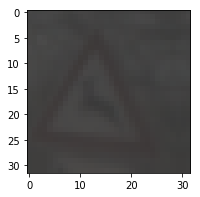

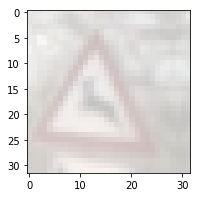

In [4]:
import random
import matplotlib.pyplot as plt
#plt.close('all')
print("Test Normalization function:")
index = random.randint(0, len(X_train))
input_image = np.array([X_train[index]])
output_image =NormalizeImage(input_image)
print(output_image.shape)
output_image =output_image[0]
output_image = output_image.squeeze()
input_image=input_image[0]
plt.figure(figsize=(3,3))
plt.imshow(input_image.astype(np.uint8));
print("The label of the image is:",y_train[index])

#print(output_image)
plt.figure(figsize=(3,3))
plt.imshow(((output_image+1.0)*127).astype(np.uint8));
plt.show()

In [5]:
X_train = NormalizeImage(X_train)
X_valid = NormalizeImage(X_valid)
X_test = NormalizeImage(X_test)

In [6]:
import os
pickle_file = 'TrafficSignNormalized_1.0.pickle'
if not os.path.isfile(pickle_file):
    print('Saving data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                    'X_valid': X_valid,
                    'y_valid': y_valid,
                    'X_test': X_test,
                    'y_test': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.
